10 11.258791503822595
12 8.915638350772653
15 7.915205920827249
17 10.548808390567357
19 368.2326578465224
22 12.315385859668496
23 10.208009853558144
24 7.647265845159383
25 12.351160459386053
13 8.725093450046268

10 10.667116953161225
12 8.126895053980503
15 7.035991098136588
17 9.895793656593211
19 368.20654729076875
22 11.74780647153145
23 9.537938891612754
24 6.743364171832226
25 11.801738305733986
13 7.938110172743388

10 10.382263941005771
12 7.720120416356027
15 6.581453231325393
17 9.5683243002881
19 368.1898184042154
22 11.459389436063569
23 9.201413275433413
24 6.279736594237646
25 11.531467454198378
13 7.541167399018708

10 10.429403018397814
12 7.7556505414425
15 6.639393995609331
17 9.599773530712387
19 368.1824724654102
22 11.471210784626573
23 9.2349688172431
24 6.35350840214491
25 11.559944141604674
13 7.595662805476419

22 11.782109151367829
24 6.947152149463798
15 7.196786135855482
19 368.1082411433609
25 11.885244291430324
10 10.805145195700339
12 8.226885613702109

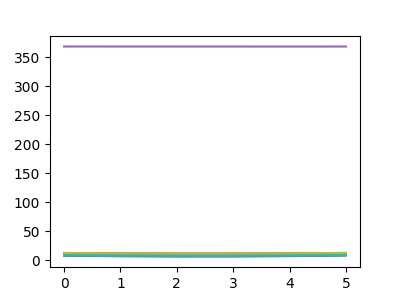

In [1]:
# Example 14: pseudo-range (3) (measured every 32 ms)

%matplotlib widget 

import json
import numpy as np
import matplotlib.pyplot as plt


def getStdDev(tcpLst,cophLst):
    p = np.polyfit(tcpLst,cophLst,14)
    fit = np.poly1d(p)
    cophStd = np.std(cophLst-fit(tcpLst))  
    cophStd *= GPS_C/SAMPLE_RATE             # standard deviation in m
    return cophStd

def cpOflCorrection(cplst):
    cpl = cplst.copy()
    ovfl = 0    
    pno,pcp = cpl[0]
    for i in range(1,len(cpl)):        
        no,cp = cpl[i]
        cp += ovfl*CODE_SAMPLES
        d = pcp - cp
        if np.isclose(abs(d),CODE_SAMPLES,rtol=1E-5,atol=200):
            cp += np.sign(d)*CODE_SAMPLES                     
            ovfl += np.sign(d) 
        cpl[i] = (no,cp)
        pno,pcp = no,cp                                       
    return cpl


def loadCpLst(fname):
    with open(fname,'r') as file:
        data=json.load(file)     
    return data

# xx is part of triangle interpolation, mx = [xx*triangle_ip + (10-xx)*parabola_ip] / 10
F1 = '../t/gpsCP_140923-t00.json'
F2 = '../t/gpsCP_140923-t02.json'
F3 = '../t/gpsCP_140923-t04.json'
F4 = '../t/gpsCP_140923-t06.json'
F5 = '../t/gpsCP_140923-t08.json'
F6 = '../t/gpsCP_140923-t10.json'
FLst = [F1,F2,F3,F4,F5,F6]
GPS_C  = 2.99792458e8
SAMPLE_RATE = 2.048E6
CODE_SAMPLES = 2048
TOW_0 = 69447                # behind last code phase error
snoStart = 1000    

res = {}
for F in FLst:
    data = loadCpLst(F)
    for satNo in data:
        cpLst = data[satNo]
        cpLst = cpOflCorrection(cpLst[snoStart:])    
        sn0,cp0 = zip(*cpLst)
        cp0Std = getStdDev(sn0,cp0)    
        if satNo in res:
            res[satNo] += [cp0Std]
        else:
            res[satNo] = [cp0Std]
        print(satNo,cp0Std)    
    print()

fig = plt.figure(figsize=(4,3))
for satNo in res:
    plt.plot(res[satNo])
    
plt.show()

with open('cpNoise.json','w') as file:
    json.dump(res,file,indent=2)


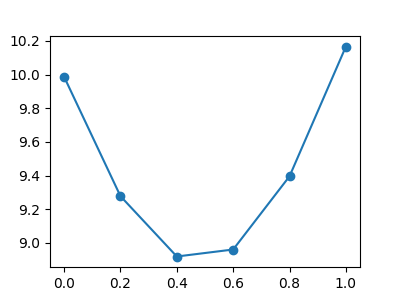

In [3]:
x = np.linspace(0,1,6)
mean = np.asarray([.0,.0,.0,.0,.0,.0])
n = 0
for satNo in res:
    if satNo != '19':
        n += 1
        mean += np.asarray(res[satNo])
mean = mean / n

fig = plt.figure(figsize=(4,3))
plt.plot(x,mean,'o-')
#plt.legend()
    
plt.show()

In [36]:
mean,std,cp0Std,cp1Std

(9.925892530318126, 14.685109332428793, 11.435067806086403, 9.538923334597117)

In [4]:
with open('cpNoise.json','w') as file:
    json.dump(res,file,indent=2)

In [5]:
res

{'10': [11.258791503822595,
  10.667116953161225,
  10.382263941005771,
  10.429403018397814,
  10.805145195700339,
  11.474563194110239],
 '12': [8.915638350772653,
  8.126895053980503,
  7.720120416356027,
  7.7556505414425,
  8.226885613702109,
  9.068510775375028],
 '15': [7.915205920827249,
  7.035991098136588,
  6.581453231325393,
  6.639393995609331,
  7.196786135855482,
  8.153564534490018],
 '17': [10.548808390567357,
  9.895793656593211,
  9.5683243002881,
  9.599773530712387,
  9.987077445766891,
  10.690718789382458],
 '19': [368.2326578465224,
  368.20654729076875,
  368.1898184042154,
  368.1824724654102,
  368.1082411433609,
  368.195930962156],
 '22': [12.315385859668496,
  11.74780647153145,
  11.459389436063569,
  11.471210784626573,
  11.782109151367829,
  12.370290291876174],
 '23': [10.208009853558144,
  9.537938891612754,
  9.201413275433413,
  9.2349688172431,
  9.636805084435554,
  10.35841103751325],
 '24': [7.647265845159383,
  6.743364171832226,
  6.279736594